In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
taxi = pd.read_csv('3_taxi_peru.csv', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [6]:
#создадим колонку, в которой указано время опоздания водителей в минутах
taxi['wait_time'] = (taxi.arrived_at - taxi.start_at).astype('timedelta64[m]')

In [10]:
#найдём водителя, который опаздывал на забронированные поездки больше остальных
taxi.query('start_type == "reserved" and wait_time > 0.0') \
    .groupby('driver_id', as_index=False) \
    .agg({'wait_time': 'count'}) \
    .sort_values('wait_time', ascending=False).head(1)

,driver_id,wait_time
24,406921adcca37705ef527b4246c0cfea,67


In [19]:
#создадим две колонки с: месяцем и днем недели, в которые был сделан заказ
taxi['month'] = taxi.start_at.dt.month
taxi['weekday'] = taxi.start_at.dt.strftime('%A')

In [32]:
#высчитаем количество заказов по месяцам
orders_by_month = taxi.groupby('month', as_index=False) \
                      .agg({'journey_id': 'count'}) \
                      .rename(columns={'journey_id': 'orders'})

C:\Users\bkunt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

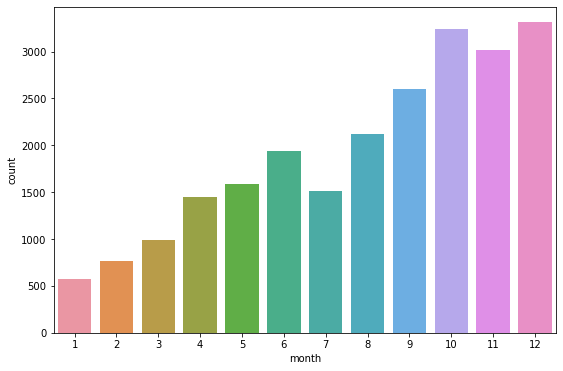

In [37]:
#построим график количества заказов по месяцам
plt.figure(figsize=(9, 6))
sns.countplot(taxi.month)

C:\Users\bkunt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='count'>

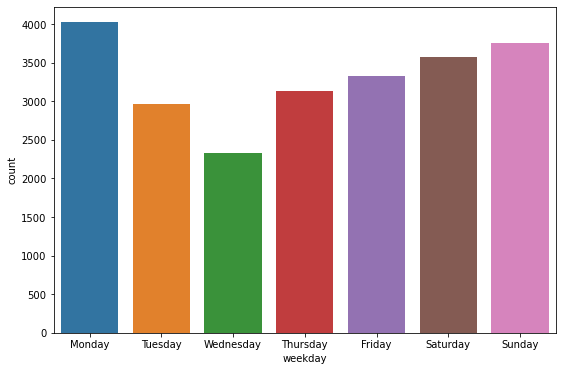

In [39]:
#построим график количества заказов по дням недели
plt.figure(figsize=(9, 6))
sns.countplot(taxi.weekday, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

<AxesSubplot:xlabel='month', ylabel='unique_users'>

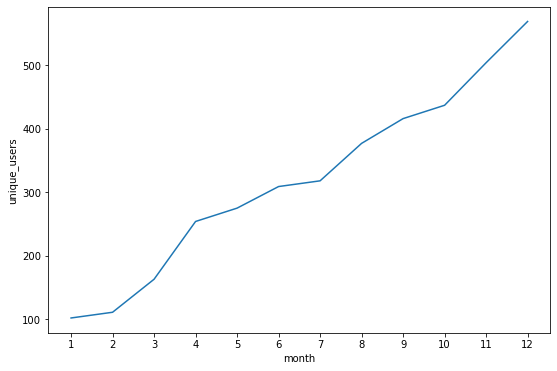

In [72]:
#график числа уникальных пользователей за месяц (MAU)
unique_users_by_month = taxi.groupby('month', as_index=False) \
                            .agg({'user_id': 'nunique'}) \
                            .rename(columns={'user_id': 'users'})

plt.figure(figsize=(9, 6))
plt.xticks(ticks=range(0, 12), labels=range(1, 13))
plt.xlabel('month')
plt.ylabel('unique_users')
unique_users_by_month.users.plot.line()